In [3]:
import os

import numpy as np
from sklearn.manifold import TSNE

import matplotlib.pyplot as plt

from utils import load_hidden_representations_from_hdf5

----

## Prompts

- `null pattern`: {premise} {hypthesis}
- `template 1`: {premise} Are we justified in saying that "{hypothesis}"?
- `template 2`: {premise} Question: {hypothesis} Yes or no?

## Plot t-SNE embeddings

In [6]:
# params
log_dir = "/logfiles"
model = "bigscience-T0_3B"
module = "encoder" # encoder or decoder

Reading embeddings: 100%|██████████| 277/277 [00:00<00:00, 2492.67it/s]


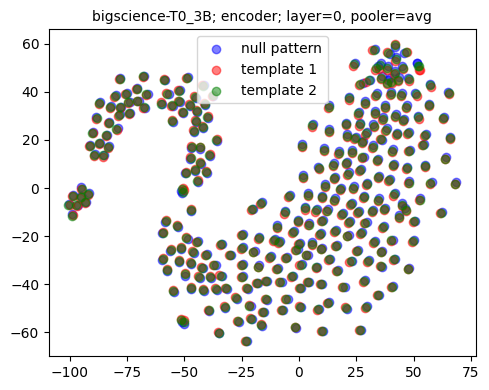

Reading embeddings: 100%|██████████| 277/277 [00:00<00:00, 1427.30it/s]


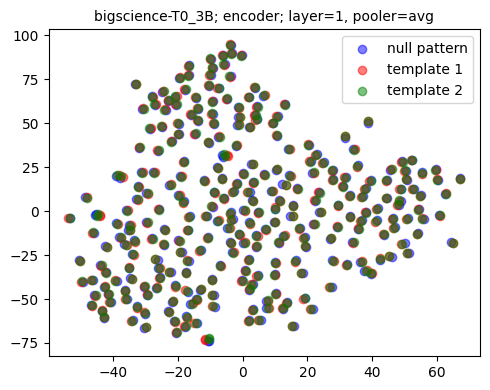

Reading embeddings: 100%|██████████| 277/277 [00:00<00:00, 1285.54it/s]


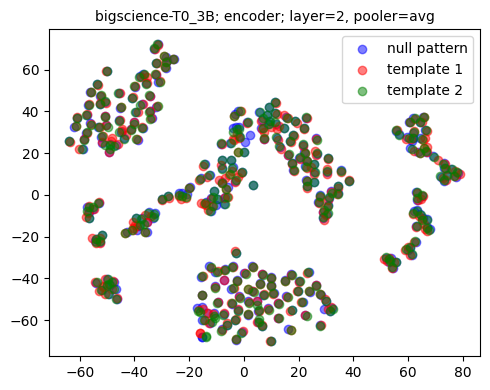

Reading embeddings: 100%|██████████| 277/277 [00:00<00:00, 2013.98it/s]


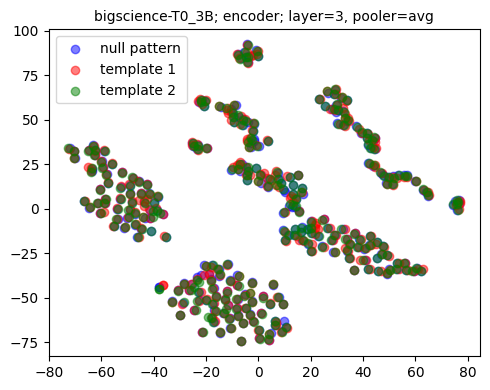

Reading embeddings: 100%|██████████| 277/277 [00:00<00:00, 1557.00it/s]


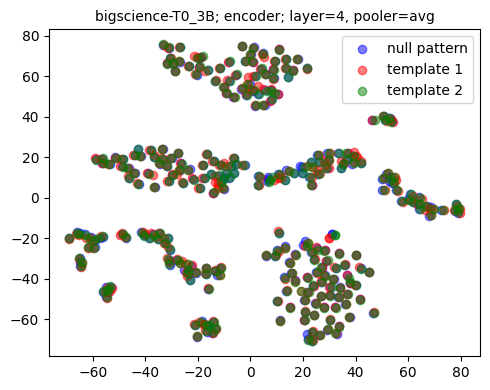

Reading embeddings: 100%|██████████| 277/277 [00:00<00:00, 1667.26it/s]


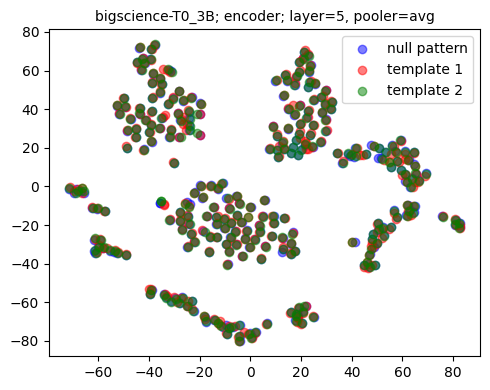

Reading embeddings: 100%|██████████| 277/277 [00:00<00:00, 1542.41it/s]


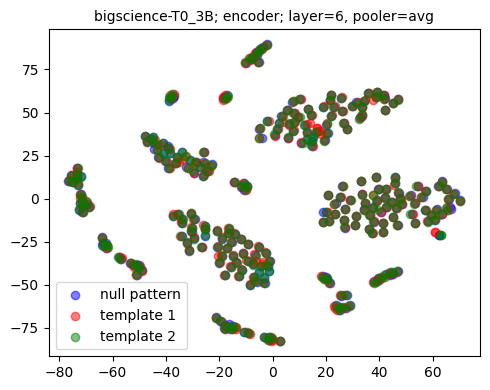

Reading embeddings: 100%|██████████| 277/277 [00:00<00:00, 3549.45it/s]


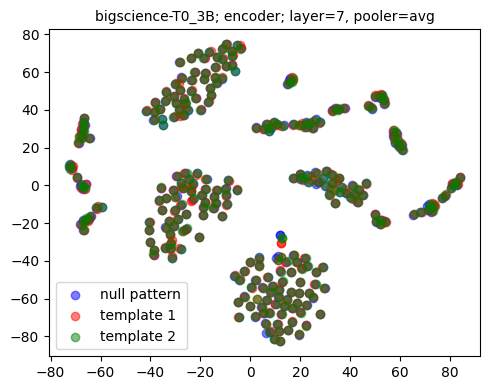

Reading embeddings: 100%|██████████| 277/277 [00:00<00:00, 1396.33it/s]


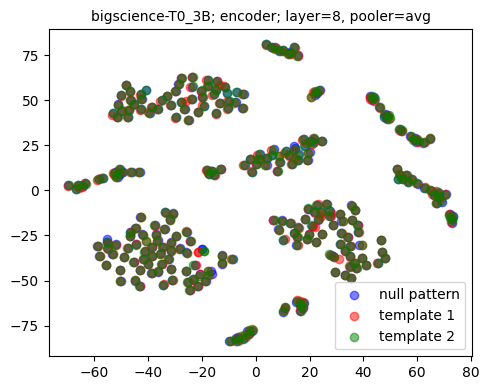

Reading embeddings: 100%|██████████| 277/277 [00:00<00:00, 928.67it/s]


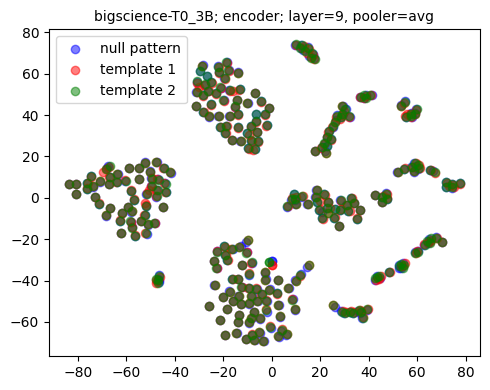

Reading embeddings: 100%|██████████| 277/277 [00:00<00:00, 1524.08it/s]


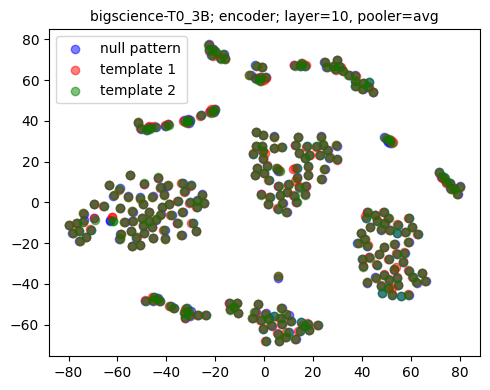

Reading embeddings: 100%|██████████| 277/277 [00:00<00:00, 3195.36it/s]


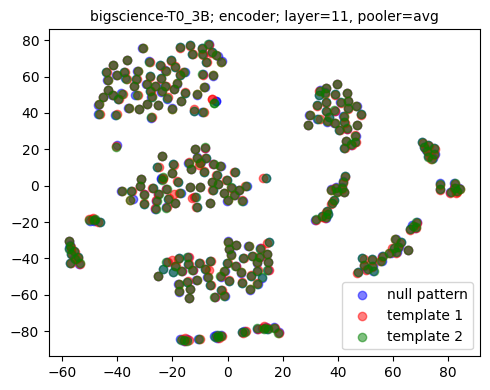

Reading embeddings: 100%|██████████| 277/277 [00:00<00:00, 1578.13it/s]


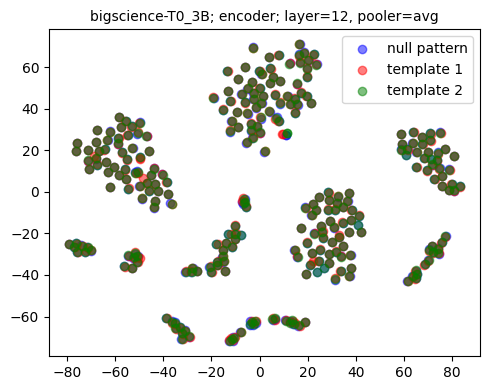

Reading embeddings: 100%|██████████| 277/277 [00:00<00:00, 1652.72it/s]


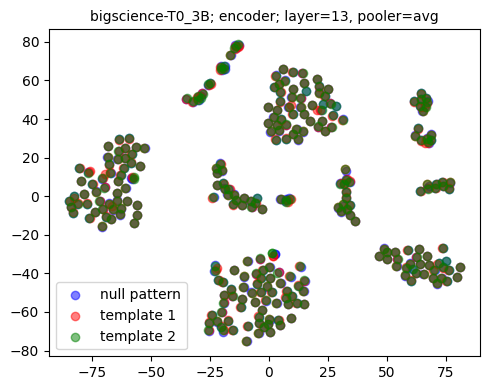

Reading embeddings: 100%|██████████| 277/277 [00:00<00:00, 1987.97it/s]


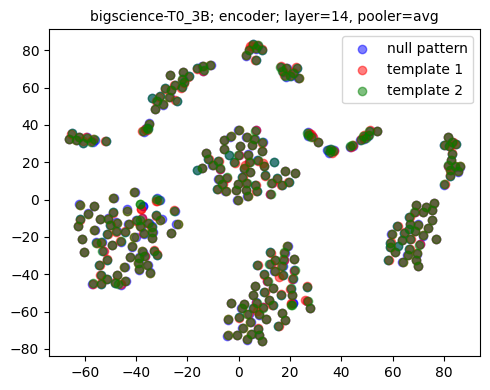

Reading embeddings: 100%|██████████| 277/277 [00:00<00:00, 2632.37it/s]


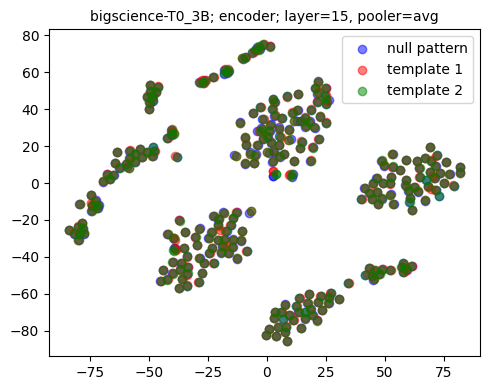

Reading embeddings: 100%|██████████| 277/277 [00:00<00:00, 2269.44it/s]


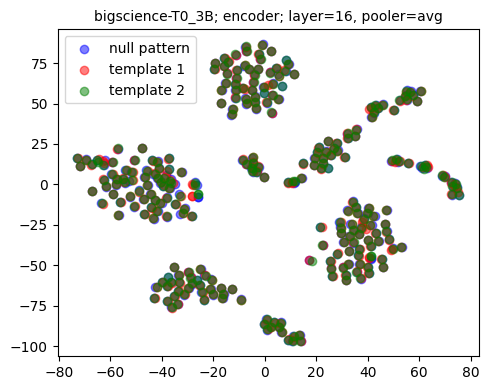

Reading embeddings: 100%|██████████| 277/277 [00:00<00:00, 1824.07it/s]


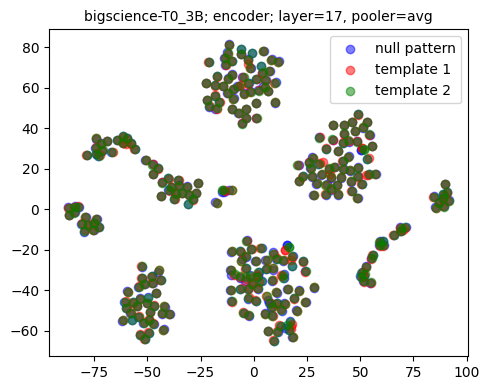

Reading embeddings: 100%|██████████| 277/277 [00:00<00:00, 1865.37it/s]


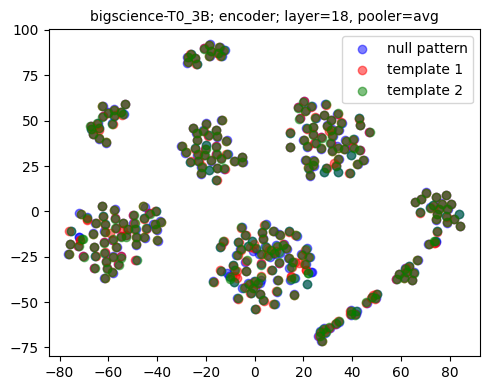

Reading embeddings: 100%|██████████| 277/277 [00:00<00:00, 1626.44it/s]


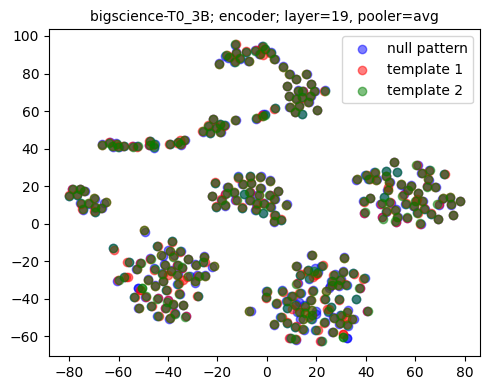

Reading embeddings: 100%|██████████| 277/277 [00:00<00:00, 1435.24it/s]


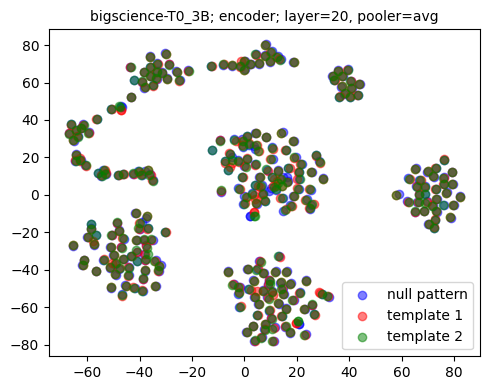

Reading embeddings: 100%|██████████| 277/277 [00:00<00:00, 1742.77it/s]


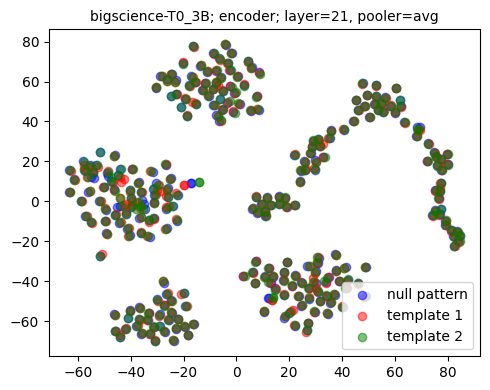

Reading embeddings: 100%|██████████| 277/277 [00:00<00:00, 2349.50it/s]


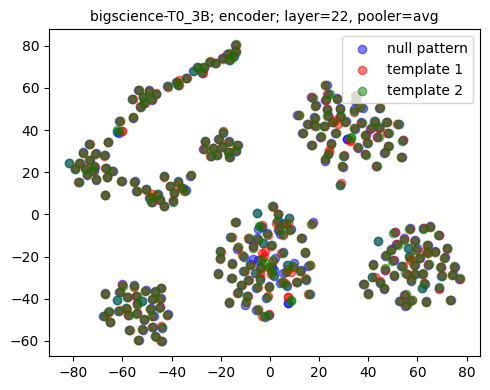

Reading embeddings: 100%|██████████| 277/277 [00:00<00:00, 1596.17it/s]


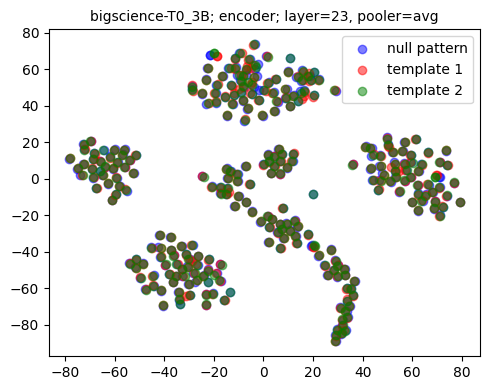

Reading embeddings: 100%|██████████| 277/277 [00:00<00:00, 2098.03it/s]


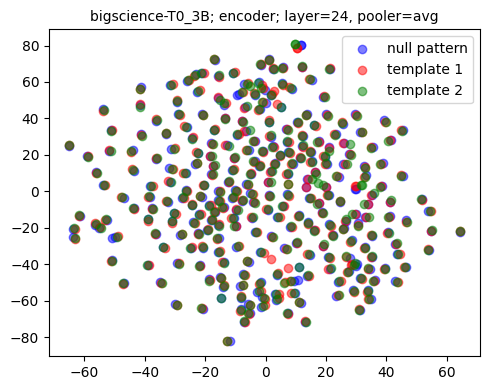

In [7]:
# for layer in range(0, 1):
# for layer in range(0, 5):
for layer in range(0, 25):
# for layer in range(24, 25):
    file_names = [
        f"rte/{model}/{module}/null_pattern/hidden_represenations_layer{layer}_avg.hdf5",
        f"rte/{model}/{module}/template_1/hidden_represenations_layer{layer}_avg.hdf5",
        f"rte/{model}/{module}/template_2/hidden_represenations_layer{layer}_avg.hdf5",
    ]   

    # load hidden representations from hdf5 file
    representations = None
    n_sequences = 0

    for file_name in file_names:
        hidden_representations = load_hidden_representations_from_hdf5(os.path.join(log_dir, file_name))
        n_sequences = hidden_representations.shape[0]

        if representations is None:
            representations = hidden_representations
        else:
            representations = np.concatenate((representations, hidden_representations), axis=0)

    # compute t-SNE embeddings
    X = TSNE(
        n_components=2, 
        perplexity=10, 
        init='random', # random or pca
        learning_rate=100,
        n_iter=1000
    ).fit_transform(representations)

    # plot t-SNE embeddings
    fig, axes = plt.subplots(1, 1, figsize=(5,4), dpi=100)

    axes.scatter(X[:n_sequences, 0], X[:n_sequences, 1], color='blue', alpha=0.5, label='null pattern') # null pattern
    axes.scatter(X[n_sequences:2*n_sequences, 0], X[n_sequences:2*n_sequences, 1], color='red', alpha=0.5, label='template 1') # template 1
    axes.scatter(X[2*n_sequences:, 0], X[2*n_sequences:, 1], color='green', alpha=0.5, label='template 2') # template 2

    axes.set_title(f"{model}; {module}; layer={layer}, pooler=avg", fontsize=10)

    axes.legend(loc="best")

    plt.tight_layout()

    plt.show()
    plt.close();